 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalepath = Path('Resources/whale_returns.csv')
whale = pd.read_csv(whalepath)

whale.set_index(pd.to_datetime(whale['Date'], infer_datetime_format=True), inplace=True)
whale.drop(columns=['Date'], inplace=True)

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale2 = whale.dropna()
whale2.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algopath = Path('Resources/algo_returns.csv')
algo = pd.read_csv(algopath)

algo.set_index(pd.to_datetime(algo['Date'], infer_datetime_format=True), inplace=True)
algo.drop(columns=['Date'], inplace=True)

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo2 = algo.dropna()
algo2.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500path = Path('Resources/sp500_history.csv')
sp500 = pd.read_csv(sp500path)


sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True), inplace=True)
sp500.drop(columns=['Date'], inplace=True)

In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_2 = sp500.convert_dtypes()
sp500_2['Close'] = sp500_2['Close'].str.replace('$', '', regex=True)
sp500_2['Close'] = sp500_2['Close'].astype('float')
sp500_2.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
#sp500_2.set_index(pd.to_datetime(sp500_2['Date'], infer_datetime_format=True), inplace=True)
#sp500_2.head
sp500_dr = sp500_2.pct_change()

In [12]:
# Drop nulls
sp500_3 = sp500_dr.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_4 = sp500_3.rename(columns = {'Close':'S&P 500'})
sp500_4.head()


,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
comb = pd.concat([whale2,algo2,sp500_4], axis=1, join='inner')
comb.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

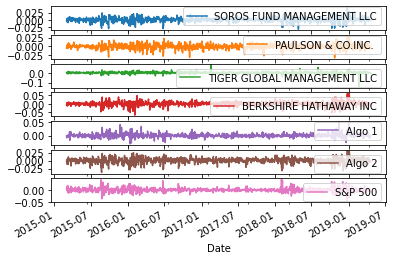

In [15]:
# Plot daily returns of all portfolios
comb.plot(subplots=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date', ylabel='Cumulative Daily Returns'>

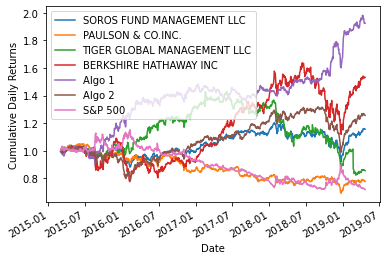

In [16]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns

cr = (1 + comb).cumprod()
cr.head()
cr.plot(xlabel='Date', ylabel='Cumulative Daily Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:ylabel='Daily Returns'>

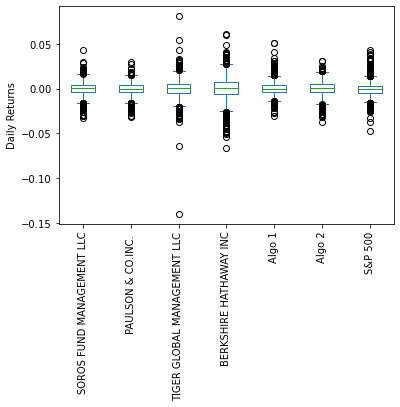

In [17]:
# Box plot to visually show risk
comb.plot(kind='box', ylabel='Daily Returns', rot=90)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
dsd_p = comb.std()
dsd_p

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
dsd_5 = comb['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
dsd_p > dsd_5


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
dsd_a = dsd_p * np.sqrt(252)
dsd_a

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

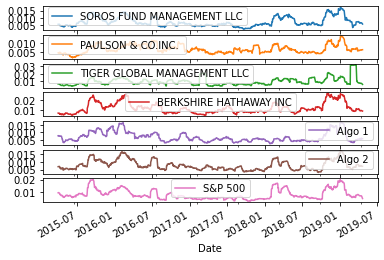

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_rsd = comb.rolling(window=21).std()
# Plot the rolling standard deviation

comb_rsd.plot(subplots=True)

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
comb_corr = comb.corr()
# Display de correlation matrix
comb_corr.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

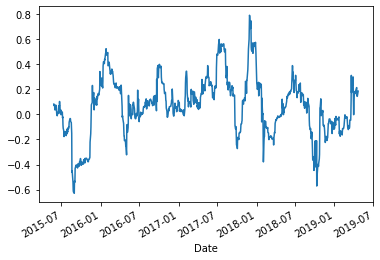

In [23]:
# Calculate covariance of a single portfolio
cvar_b = comb['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(comb['S&P 500'])
# Calculate variance of S&P 500
var_5 = comb['S&P 500'].rolling(window=60).var()
# Computing beta
beta_b = cvar_b/var_5
# Plot beta trend
beta_b.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [42]:
# Use `ewm` to calculate the rolling window
comb.ewm(halflife=21).std().head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sr = (comb.mean() * 252) / (comb.std() * np.sqrt(252))
sr

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:>

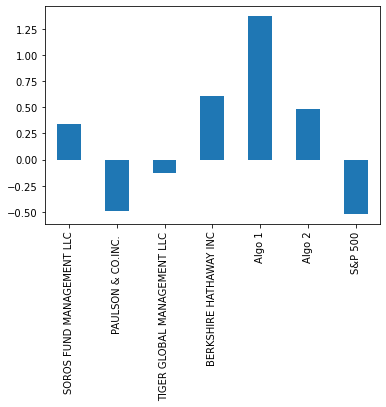

In [26]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

While algo1 outperforms everything, algo2 is only sligthly better than Soros Fund Management and comes just behhind Berkshire Hathaway

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
amzn_path = Path('Portfolio-Data/amazon_googlefi.csv')
amzn = pd.read_csv(amzn_path)

amzn['Date'] = amzn['Date'].str.replace('16', '', regex=True)
amzn['Date'] = amzn['Date'].str.replace(':00', '', regex=True)

amzn = amzn.rename(columns = {'Close':'AMZN'})

amzn.head()

,Date,AMZN
0,10/1/2012,12.60
1,10/2/2012,12.53
2,10/3/2012,12.80
3,10/4/2012,13.02
4,10/5/2012,12.93


In [28]:
# Reading data from 2nd stock
att_path = Path('Portfolio-Data/at&t_googlefi.csv')
att = pd.read_csv(att_path)

att['Date'] = att['Date'].str.replace('16', '', regex=True)
att['Date'] = att['Date'].str.replace(':00', '', regex=True)

att = att.rename(columns = {'Close':'AT&T'})
att = att.rename(columns = {'Date':'Date2'})

att.head()

,Date2,AT&T
0,10/1/2012,28.49
1,10/2/2012,28.53
2,10/3/2012,28.81
3,10/4/2012,28.93
4,10/5/2012,28.57


In [29]:
# Reading data from 3rd stock
msft_path = Path('Portfolio-Data/microsoft_googlefi.csv')
msft = pd.read_csv(msft_path)

msft['Date'] = msft['Date'].str.replace('16', '', regex=True)
msft['Date'] = msft['Date'].str.replace(':00', '', regex=True)

msft = msft.rename(columns = {'Close':'MSFT'})
msft = msft.rename(columns = {'Date':'Date3'})

msft.head()



,Date3,MSFT
0,10/1/2012,29.49
1,10/2/2012,29.66
2,10/3/2012,29.86
3,10/4/2012,30.03
4,10/5/2012,29.85


In [30]:
# Combine all stocks in a single DataFrame


comb2 = pd.concat([amzn, att, msft], axis=1, join='inner')
comb2.head()

#comb2.set_index(pd.to_datetime(comb2['Date'], errors='coerce', infer_datetime_format=True), inplace=True)
#comb2.dropna()

,Date,AMZN,Date2,AT&T,Date3,MSFT
0,10/1/2012,12.60,10/1/2012,28.49,10/1/2012,29.49
1,10/2/2012,12.53,10/2/2012,28.53,10/2/2012,29.66
2,10/3/2012,12.80,10/3/2012,28.81,10/3/2012,29.86
3,10/4/2012,13.02,10/4/2012,28.93,10/4/2012,30.03
4,10/5/2012,12.93,10/5/2012,28.57,10/5/2012,29.85


In [31]:
# Reorganize portfolio data by having a column per symbol

comb2.set_index(pd.to_datetime(comb2['Date'], errors='coerce', infer_datetime_format=True), inplace=True)
comb2.drop(columns=['Date'], inplace=True)
comb2.drop(columns=['Date2'], inplace=True)
comb2.drop(columns=['Date3'], inplace=True)
comb2.dropna()
comb2.head()

,AMZN,AT&T,MSFT
Date,,,
2012-10-01,12.60,28.49,29.49
2012-10-02,12.53,28.53,29.66
2012-10-03,12.80,28.81,29.86
2012-10-04,13.02,28.93,30.03
2012-10-05,12.93,28.57,29.85


In [43]:
# Calculate daily returns
comb2_dr = comb2.pct_change()
# Drop NAs
comb2_dr2 = comb2_dr.dropna()
# Display sample data
comb2_dr2.head()

,AMZN,AT&T,MSFT
Date,,,
2012-10-02,-0.005556,0.001404,0.005765
2012-10-03,0.021548,0.009814,0.006743
2012-10-04,0.017187,0.004165,0.005693
2012-10-05,-0.006912,-0.012444,-0.005994
2012-10-08,0.001547,-0.005250,-0.002345


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
wdr = comb2_dr.dot(weights)
# Display sample data
wdr.head()

Date
2012-10-01         NaN
2012-10-02    0.000538
2012-10-03    0.012702
2012-10-04    0.009015
2012-10-05   -0.008450
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
comb3 = comb.join(comb2_dr2)
comb3.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AMZN,AT&T,MSFT
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.002593,-0.006503,-0.013674
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.004680,-0.011937,-0.005083
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.013062,0.000000,0.001161
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.020113,-0.015199,-0.017397
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003684,-0.003957,0.011568


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comb3.dropna()
comb3.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AMZN,AT&T,MSFT
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.002593,-0.006503,-0.013674
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.004680,-0.011937,-0.005083
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.013062,0.000000,0.001161
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.020113,-0.015199,-0.017397
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003684,-0.003957,0.011568


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
dsd_p2 = comb3.std()
dsd_a2 = dsd_p2 * np.sqrt(252)
dsd_a2

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
AMZN                           0.302552
AT&T                           0.197309
MSFT                           0.239627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

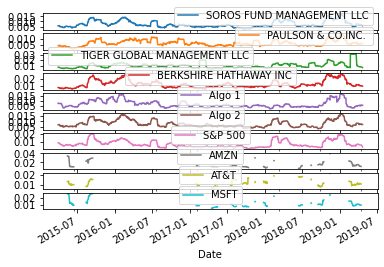

In [37]:
# Calculate rolling standard deviation
comb3_rsd = comb3.rolling(window=21).std()
# Plot rolling standard deviation
comb3_rsd.plot(subplots=True)

### Calculate and plot the correlation

In [44]:
# Calculate and plot the correlation
comb3_corr = comb3.corr()
comb3_corr.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AMZN,AT&T,MSFT
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.573961,0.169408,0.600224
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.464917,0.141774,0.480233
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.345891,0.150406,0.408999
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.653577,0.147212,0.666497
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.233977,0.095121,0.173070
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.559623,0.208995,0.609353
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,0.024681,-0.274297,-0.001468
AMZN,0.573961,0.464917,0.345891,0.653577,0.233977,0.559623,0.024681,1.000000,0.085149,0.710990
AT&T,0.169408,0.141774,0.150406,0.147212,0.095121,0.208995,-0.274297,0.085149,1.000000,0.200231
MSFT,0.600224,0.480233,0.408999,0.666497,0.173070,0.609353,-0.001468,0.710990,0.200231,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

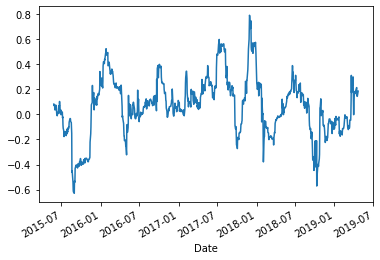

In [39]:
# Calculate and plot Beta
cvar_p = comb3.rolling(window=60).cov(comb3['S&P 500'])
var_5_2 = comb3['S&P 500'].rolling(window=60).var()

beta_p = cvar_p/var_5_2
beta_b.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
sr2 = (comb3.mean() * 252) / (comb3.std() * np.sqrt(252))

<AxesSubplot:>

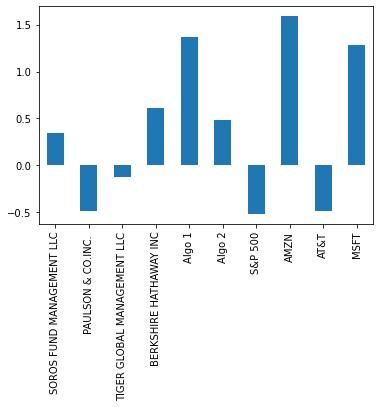

In [41]:
# Visualize the sharpe ratios as a bar plot
sr2.plot(kind='bar')

### How does your portfolio do?

In aggregate, my portfolio performs better than the market.